## Incident Root Cause Analysis

Incident Reports in ITOps usually states the symptoms. Identifying the root cause of the symptom quickly is a key determinant to reducing resolution times and improving user satisfaction.

In [169]:
#libraries
import pandas as pd
import os
import tensorflow as tf
import numpy as np


In [170]:
#dataset
df=pd.read_csv('root_cause_analysis.csv')
df.head()

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY_LEAK
1,2,0,0,0,0,0,0,1,MEMORY_LEAK
2,3,0,1,1,0,0,1,1,MEMORY_LEAK
3,4,0,1,0,1,1,0,1,MEMORY_LEAK
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


In [171]:
df['ROOT_CAUSE'].unique()

array(['MEMORY_LEAK', 'NETWORK_DELAY', 'DATABASE_ISSUE'], dtype=object)

In [172]:
df.sample()

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
597,598,1,1,1,0,0,0,0,MEMORY_LEAK


In [173]:
X_data=df.drop(['ROOT_CAUSE', 'ID'], axis=1)
X_data.head()

,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003
0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,1
2,0,1,1,0,0,1,1
3,0,1,0,1,1,0,1
4,1,1,0,1,0,1,0


In [174]:
X1_data=X_data.to_numpy().astype(float)

In [175]:
len(X1_data)

1000

In [176]:
print(X1_data[5,:])

[0. 0. 1. 1. 0. 0. 0.]


In [177]:
y_data=df['ROOT_CAUSE']
y_data.head()

0      MEMORY_LEAK
1      MEMORY_LEAK
2      MEMORY_LEAK
3      MEMORY_LEAK
4    NETWORK_DELAY
Name: ROOT_CAUSE, dtype: object

In [178]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [179]:
labelencoder=preprocessing.LabelEncoder()

In [180]:
y_data=labelencoder.fit_transform(y_data)
len(y_data)


1000

In [181]:
print(y_data[:5])

[1 1 1 1 2]


In [182]:
Y1_data=tf.keras.utils.to_categorical(y_data, 3)
Y1_data.shape

(1000, 3)

In [183]:
print(Y1_data[0:5])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [184]:
len(Y1_data)

1000

In [185]:
#split data

x_train, x_test, y_train, y_test= train_test_split(X1_data, Y1_data, test_size=0.1)

In [186]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(900, 7) (900, 3)
(100, 7) (100, 3)


In [187]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (900, 7)
y_train shape: (900, 3)


In [188]:
#create a ANN model -structured model

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

In [191]:
verbose=1
output_classes=len(label_encoder.classes_)
validation_split=0.2
hidden=128

model=tf.keras.models.Sequential()
#first layer
model.add(keras.layers.Dense(hidden,input_shape=(7,),name="layer1", activation='relu'))
#2 layer
model.add(keras.layers.Dense(hidden,name="layer2", activation='relu'))   
#layer3
model.add(keras.layers.Dense(hidden,name="layer3", activation='relu')) 
#output layer         
model.add(keras.layers.Dense(output_classes,name="output_layer", activation='softmax'))          
model.compile(loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()
                             

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               1024      
                                                                 
 layer2 (Dense)              (None, 128)               16512     
                                                                 
 layer3 (Dense)              (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 34435 (134.51 KB)
Trainable params: 34435 (134.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [206]:
batch=300
epoch=30
history=model.fit(x_train, y_train, batch_size=batch, epochs=epoch,verbose=verbose,validation_split=0.2)


Epoch 1/30
3/3 [==============================] - 0s 47ms/step - loss: 0.2829 - accuracy: 0.8625 - val_loss: 0.3429 - val_accuracy: 0.8667
Epoch 2/30
3/3 [==============================] - 0s 30ms/step - loss: 0.3052 - accuracy: 0.8597 - val_loss: 0.3796 - val_accuracy: 0.8500
Epoch 3/30
3/3 [==============================] - 0s 26ms/step - loss: 0.2892 - accuracy: 0.8556 - val_loss: 0.3578 - val_accuracy: 0.8611
Epoch 4/30
3/3 [==============================] - 0s 26ms/step - loss: 0.2878 - accuracy: 0.8681 - val_loss: 0.3791 - val_accuracy: 0.8556
Epoch 5/30
3/3 [==============================] - 0s 25ms/step - loss: 0.2874 - accuracy: 0.8653 - val_loss: 0.3694 - val_accuracy: 0.8556
Epoch 6/30
3/3 [==============================] - 0s 30ms/step - loss: 0.2862 - accuracy: 0.8611 - val_loss: 0.3999 - val_accuracy: 0.8444
Epoch 7/30
3/3 [==============================] - 0s 28ms/step - loss: 0.2935 - accuracy: 0.8597 - val_loss: 0.3524 - val_accuracy: 0.8778
Epoch 8/30
3/3 [===========

In [207]:
h=pd.DataFrame(history.history)
h

,loss,accuracy,val_loss,val_accuracy
0,0.282917,0.862500,0.342894,0.866667
1,0.305225,0.859722,0.379610,0.850000
2,0.289224,0.855556,0.357770,0.861111
3,0.287774,0.868056,0.379113,0.855556
4,0.287431,0.865278,0.369365,0.855556
5,0.286187,0.861111,0.399879,0.844444
6,0.293507,0.859722,0.352371,0.877778
7,0.296083,0.856944,0.348409,0.872222
8,0.284856,0.866667,0.353907,0.866667
9,0.280867,0.858333,0.356088,0.866667


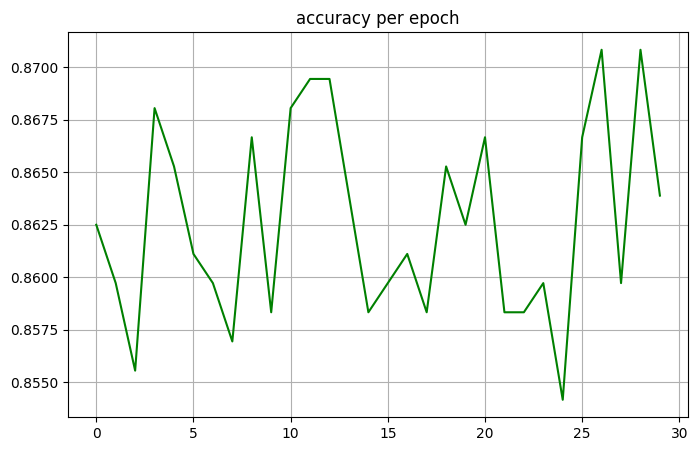

In [208]:
import matplotlib.pyplot as plt
h['accuracy'].plot(figsize=(8,5), color="g")
plt.title ("accuracy per epoch")
plt.grid()
plt.show()

In [199]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.4059 - accuracy: 0.8300


[0.4058540463447571, 0.8299999833106995]

In [216]:
#prediction Pass individual flags to Predict the root cause
import numpy as np

CPU_LOAD=0
MEMORY_LOAD=0
DELAY=1
ERROR_1000=0
ERROR_1001=0
ERROR_1002=1
ERROR_1003=1
prediction1=np.argmax(model.predict(
    [[CPU_LOAD,MEMORY_LOAD,DELAY,
      ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003]]), axis=1 )



1/1 [==============================] - 0s 63ms/step


In [217]:
prediction1


array([2], dtype=int64)

In [220]:
labelencoder.inverse_transform(prediction1)


array(['NETWORK_DELAY'], dtype=object)

In [224]:
# prectiontion2

CPU_LOAD=0
MEMORY_LOAD=0
DELAY=1
ERROR_1000=0
ERROR_1001=0
ERROR_1002=1
ERROR_1003=1


CPU_LOAD=1
MEMORY_LOAD=0
DELAY=1
ERROR_1000=1
ERROR_1001=0
ERROR_1002=1
ERROR_1003=1

CPU_LOAD=1
MEMORY_LOAD=1
DELAY=1
ERROR_1000=1
ERROR_1001=1
ERROR_1002=1
ERROR_1003=1

prediction2=np.argmax(model.predict([[0,0,1,0,0,1,1],
                                   [1,0,1,1,0,1,1],
                                    [1,1,1,1,1,1,1]]), axis=1)

1/1 [==============================] - 0s 50ms/step


In [225]:
prediction2

array([2, 2, 0], dtype=int64)

In [226]:
print(labelencoder.inverse_transform(prediction2))

['NETWORK_DELAY' 'NETWORK_DELAY' 'DATABASE_ISSUE']
